In [1]:
import requests as r

In [2]:
url = 'https://www.jaap.nl/koophuizen/noord+holland/groot-amsterdam/amsterdam'

In [3]:
response = r.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.text

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]> <html lang="nl" class="no-js ie6 oldie"> <![endif]-->\r\n<!--[if IE 7]>    <html lang="nl" class="no-js ie7 oldie"> <![endif]-->\r\n<!--[if IE 8]>    <html lang="nl" class="no-js ie8 oldie"> <![endif]-->\r\n<!--[if IE 9]>    <html lang="nl" class="no-js ie9"> <![endif]-->\r\n<!--[if gt IE 9]><!-->\r\n<html class=\'no-js\' lang=\'nl\'>\r\n<!--<![endif]-->\r\n<head>\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\r\n    <!-- Deze site is gemaakt door JAAP.NL BV -->\r\n    <!-- info[at]jaap.nl -->\r\n    <!-- Server: HURRICANE -->\r\n    <title>Koopwoningen in Amsterdam</title>\r\n        <link rel="canonical" href="https://www.jaap.nl/koophuizen/noord+holland/groot-amsterdam/amsterdam" />\r\n            <link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.jaap.nl/koophuizen/noord+holland/groot-amsterdam/amsterdam">\r\n            <link rel="next" href="/koophuizen/noord+holland/groot-ams

In [6]:
from lxml import etree

In [7]:
html = etree.HTML(response.text)
result = etree.tostring(html, pretty_print=True, method="html")

In [8]:
import json

In [9]:
json_text = json.loads(html.xpath('//script[@id = "page-data"]/text()')[0].strip())

In [11]:
json_text['properties']

[{'app': False,
  'area': 212,
  'detailsUrl': '/te-koop/noord+holland/groot-amsterdam/amsterdam/1019wx/scheepstimmermanstraat+6/10235695/overzicht',
  'expired': False,
  'houseTypeValue': 'Herenhuis',
  'id': '10235695',
  'latLng': {'latitude': 52.371965, 'longitude': 4.947405},
  'location': {'city': 'AMSTERDAM',
   'street': 'Scheepstimmermanstraat 6',
   'zipcode': '1019WX'},
  'lotSize': 91,
  'market': 'sale',
  'openHouseDate': None,
  'openHouseTimes': None,
  'openhouse': False,
  'photo': 'E7714AFD24A65AF4D5D7EDDB1BC6816B',
  'price': 1049000,
  'priceToShow': 1049000,
  'showoffColor': None,
  'showoffCustomText': None,
  'showoffPhotoText': None,
  'spotlight': False,
  'veiling': False},
 {'app': False,
  'area': 302,
  'detailsUrl': '/te-koop/noord+holland/groot-amsterdam/amsterdam/1035pm/zuideinde+286/9607568/overzicht',
  'expired': False,
  'houseTypeValue': 'Vrijstaande woning',
  'id': '9607568',
  'latLng': {'latitude': 52.422591, 'longitude': 4.890231},
  'locati

In [14]:
def get_html_response(url):
    
    response = r.get(url)

    html = etree.HTML(response.text)
    result = etree.tostring(html, pretty_print=True, method="html")
    
    pages = html.xpath('//span[@class = "page-info"]/text()')
    qty_pages = int(pages[0].strip().split('van ')[1])
    
    return (result,qty_pages)

In [40]:
def crawl_jaap():
    
    from lxml import etree
    import json
    import time
    
    apartment_list = []
    
    i = 1
    
    while True:
        time.sleep(1)
        
        start_url = 'https://www.jaap.nl/koophuizen/noord+holland/groot-amsterdam/amsterdam/p{}'.format(i)
    
        result,qty_pages = get_html_response(start_url)

        json_text = json.loads(html.xpath('//script[@id = "page-data"]/text()')[0].strip())
        apartment_dict = json_text['properties']
        for apartment in apartment_dict:
            apartment_list.append(apartment)
        
        i = i+1
        
        if (i == qty_pages):
            break
            
    return apartment_list

In [41]:
ap_dict = crawl_jaap()

In [42]:
ap_dict

[{'app': False,
  'area': 212,
  'detailsUrl': '/te-koop/noord+holland/groot-amsterdam/amsterdam/1019wx/scheepstimmermanstraat+6/10235695/overzicht',
  'expired': False,
  'houseTypeValue': 'Herenhuis',
  'id': '10235695',
  'latLng': {'latitude': 52.371965, 'longitude': 4.947405},
  'location': {'city': 'AMSTERDAM',
   'street': 'Scheepstimmermanstraat 6',
   'zipcode': '1019WX'},
  'lotSize': 91,
  'market': 'sale',
  'openHouseDate': None,
  'openHouseTimes': None,
  'openhouse': False,
  'photo': 'E7714AFD24A65AF4D5D7EDDB1BC6816B',
  'price': 1049000,
  'priceToShow': 1049000,
  'showoffColor': None,
  'showoffCustomText': None,
  'showoffPhotoText': None,
  'spotlight': False,
  'veiling': False},
 {'app': False,
  'area': 302,
  'detailsUrl': '/te-koop/noord+holland/groot-amsterdam/amsterdam/1035pm/zuideinde+286/9607568/overzicht',
  'expired': False,
  'houseTypeValue': 'Vrijstaande woning',
  'id': '9607568',
  'latLng': {'latitude': 52.422591, 'longitude': 4.890231},
  'locati

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame.from_dict(ap_dict)

In [84]:
df.to_csv('Apartments_koopen.csv')

In [45]:
df.shape

(2580, 21)

In [46]:
df.head()

,app,area,detailsUrl,expired,houseTypeValue,id,latLng,location,lotSize,market,...,openHouseTimes,openhouse,photo,price,priceToShow,showoffColor,showoffCustomText,showoffPhotoText,spotlight,veiling
0,False,212,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,10235695,"{'longitude': 4.947405, 'latitude': 52.371965}","{'street': 'Scheepstimmermanstraat 6', 'zipcod...",91,sale,...,None,False,E7714AFD24A65AF4D5D7EDDB1BC6816B,1049000,1049000,None,None,None,False,False
1,False,302,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Vrijstaande woning,9607568,"{'longitude': 4.890231, 'latitude': 52.422591}","{'street': 'Zuideinde 286', 'zipcode': '1035PM...",1470,sale,...,None,False,2CD66E27C15E39792AB5DF9468DB3ACF,1395000,1395000,None,None,None,False,False
2,False,103,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Eengezinswoning,6902695,"{'longitude': 4.992121, 'latitude': 52.378324}","{'street': 'Durgerdammerdijk 119', 'zipcode': ...",265,sale,...,None,False,4E95BCFF9E388C3331A6E0FB7C9E3C84,700000,700000,None,None,None,False,False
3,False,150,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,9605659,"{'longitude': 4.931652, 'latitude': 52.408917}","{'street': 'Diopter 80', 'zipcode': '1025MS', ...",167,sale,...,None,False,3E330E21896C679AC2F5CC386AFF3A63,539080,539080,None,None,None,False,False
4,False,285,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,11898385,"{'longitude': 4.867852, 'latitude': 52.361478}","{'street': 'Eerste Helmersstraat 201', 'zipcod...",90,sale,...,None,False,1A3CB241E1A8B623F388218342BC1FDA,1650000,1650000,None,None,None,False,False


In [62]:
pd.concat([df, pd.Series.from_array([i for i in [d for d in df.latLng]])])

,app,area,detailsUrl,expired,houseTypeValue,id,latLng,location,lotSize,market,...,openhouse,photo,price,priceToShow,showoffColor,showoffCustomText,showoffPhotoText,spotlight,veiling,0
0,False,212.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,10235695,"{'longitude': 4.947405, 'latitude': 52.371965}","{'street': 'Scheepstimmermanstraat 6', 'zipcod...",91,sale,...,False,E7714AFD24A65AF4D5D7EDDB1BC6816B,1049000.0,1049000.0,None,None,None,False,False,NaN
1,False,302.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Vrijstaande woning,9607568,"{'longitude': 4.890231, 'latitude': 52.422591}","{'street': 'Zuideinde 286', 'zipcode': '1035PM...",1470,sale,...,False,2CD66E27C15E39792AB5DF9468DB3ACF,1395000.0,1395000.0,None,None,None,False,False,NaN
2,False,103.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Eengezinswoning,6902695,"{'longitude': 4.992121, 'latitude': 52.378324}","{'street': 'Durgerdammerdijk 119', 'zipcode': ...",265,sale,...,False,4E95BCFF9E388C3331A6E0FB7C9E3C84,700000.0,700000.0,None,None,None,False,False,NaN
3,False,150.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,9605659,"{'longitude': 4.931652, 'latitude': 52.408917}","{'street': 'Diopter 80', 'zipcode': '1025MS', ...",167,sale,...,False,3E330E21896C679AC2F5CC386AFF3A63,539080.0,539080.0,None,None,None,False,False,NaN
4,False,285.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,11898385,"{'longitude': 4.867852, 'latitude': 52.361478}","{'street': 'Eerste Helmersstraat 201', 'zipcod...",90,sale,...,False,1A3CB241E1A8B623F388218342BC1FDA,1650000.0,1650000.0,None,None,None,False,False,NaN
5,False,140.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,6901804,"{'longitude': 4.877932, 'latitude': 52.374706}","{'street': 'Nieuwe Leliestraat 186', 'zipcode'...",48,sale,...,False,CBA002C39B3AFC0938EC0A60B6078E2F,890000.0,890000.0,None,None,None,False,False,NaN
6,True,101.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Bovenwoning,15138643,"{'longitude': 4.850819, 'latitude': 52.360512}","{'street': 'Van Walbeeckstraat 23-3 + 4', 'zip...",Onbekend,sale,...,False,FE332624D3AA448B8982803116E541D0,590000.0,590000.0,None,None,None,False,False,NaN
7,True,58.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Appartement,14249272,"{'longitude': 4.860247, 'latitude': 52.380022}","{'street': 'Anna van Burenstraat 17 I', 'zipco...",58,sale,...,False,211D11E29BF0A059EBB3625DDA98AF05,275000.0,275000.0,None,None,None,False,False,NaN
8,False,94.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,15440354,None,"{'street': 'Joris Ivensstraat 7', 'zipcode': '...",45,sale,...,False,2FA879785931FF0CFCE3925BD6700681,469000.0,469000.0,None,None,None,False,False,NaN
9,False,100.0,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Woning,9618153,"{'longitude': 4.801676, 'latitude': 52.354419}","{'street': 'Hoekenes 60', 'zipcode': '1068MZ',...",235,sale,...,False,3085F53F122057105785FF9B901CE5A5,475000.0,475000.0,None,None,None,False,False,NaN


In [78]:
df['lat'] = [d.get('latitude') if d is not None else 0 for d in df['latLng']]
df['lng'] = [d.get('longitude') if d is not None else 0 for d in df['latLng']]

In [79]:
df = df.drop('latLng', axis=1)

In [93]:
df['street'] = [d.get('street') if d is not None else 0 for d in df['location']]
df['zipcode'] = [d.get('zipcode') if d is not None else 0 for d in df['location']]
df['city'] = [d.get('city') if d is not None else 0 for d in df['location']]

In [94]:
df = df.drop('location', axis=1)

In [95]:
df.head()

,app,area,detailsUrl,expired,houseTypeValue,id,lotSize,market,openHouseDate,openHouseTimes,...,showoffColor,showoffCustomText,showoffPhotoText,spotlight,veiling,lat,lng,street,zipcode,city
0,False,212,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,10235695,91,sale,None,None,...,None,None,None,False,False,52.371965,4.947405,Scheepstimmermanstraat 6,1019WX,AMSTERDAM
1,False,302,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Vrijstaande woning,9607568,1470,sale,None,None,...,None,None,None,False,False,52.422591,4.890231,Zuideinde 286,1035PM,AMSTERDAM
2,False,103,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Eengezinswoning,6902695,265,sale,None,None,...,None,None,None,False,False,52.378324,4.992121,Durgerdammerdijk 119,1026CG,AMSTERDAM
3,False,150,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,9605659,167,sale,None,None,...,None,None,None,False,False,52.408917,4.931652,Diopter 80,1025MS,AMSTERDAM
4,False,285,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,11898385,90,sale,None,None,...,None,None,None,False,False,52.361478,4.867852,Eerste Helmersstraat 201,1054DV,AMSTERDAM


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
%matplotlib inline

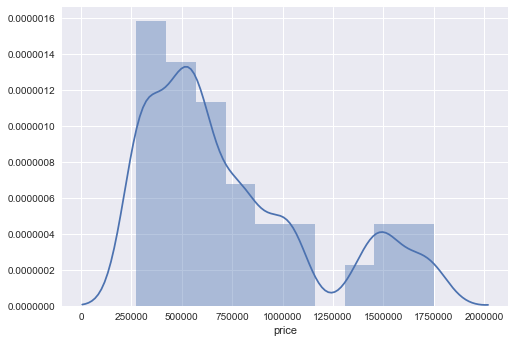

In [54]:
sns.distplot(df.price, bins=10)

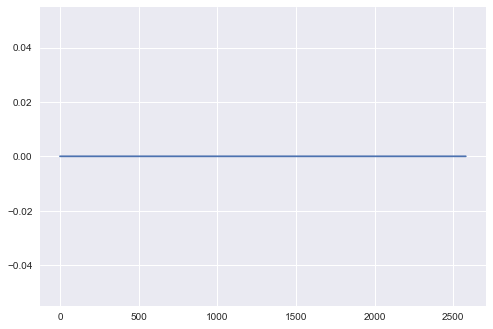

In [87]:
plt.plot(df.spotlight)

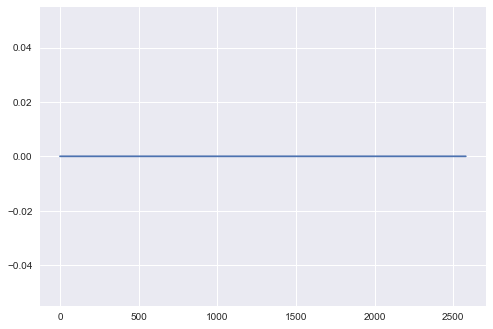

In [88]:
plt.plot(df.openhouse)

In [92]:
df.head()

,app,area,detailsUrl,expired,houseTypeValue,id,location,lotSize,market,openHouseDate,...,photo,price,priceToShow,showoffColor,showoffCustomText,showoffPhotoText,spotlight,veiling,lat,lng
0,False,212,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Herenhuis,10235695,"{'street': 'Scheepstimmermanstraat 6', 'zipcod...",91,sale,None,...,E7714AFD24A65AF4D5D7EDDB1BC6816B,1049000,1049000,None,None,None,False,False,52.371965,4.947405
1,False,302,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Vrijstaande woning,9607568,"{'street': 'Zuideinde 286', 'zipcode': '1035PM...",1470,sale,None,...,2CD66E27C15E39792AB5DF9468DB3ACF,1395000,1395000,None,None,None,False,False,52.422591,4.890231
2,False,103,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Eengezinswoning,6902695,"{'street': 'Durgerdammerdijk 119', 'zipcode': ...",265,sale,None,...,4E95BCFF9E388C3331A6E0FB7C9E3C84,700000,700000,None,None,None,False,False,52.378324,4.992121
3,False,150,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,9605659,"{'street': 'Diopter 80', 'zipcode': '1025MS', ...",167,sale,None,...,3E330E21896C679AC2F5CC386AFF3A63,539080,539080,None,None,None,False,False,52.408917,4.931652
4,False,285,/te-koop/noord+holland/groot-amsterdam/amsterd...,False,Tussenwoning,11898385,"{'street': 'Eerste Helmersstraat 201', 'zipcod...",90,sale,None,...,1A3CB241E1A8B623F388218342BC1FDA,1650000,1650000,None,None,None,False,False,52.361478,4.867852


In [105]:
df.shape

(2580, 24)

In [1]:
import pandas as pd

In [ ]:
df_wonen = pd.read_csv('')